In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


drive_mount = False
if drive_mount:
    from google.colab import drive
    drive.mount('/content/drive/')
    DATA_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/datasets"
    MODEL_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/models"
else:
    DATA_DIR = "../datasets"
    MODEL_DIR = "../models"
EPL_TRAINING_DATA_CSV = DATA_DIR + "/epl-training-with-expenditure-income.csv"
EPL_TEST_DATA_CSV = DATA_DIR + "/sample-submission.csv"


# Read the CSV file
epl_training_df = pd.read_csv(EPL_TRAINING_DATA_CSV)
epl_test_df = pd.read_csv(EPL_TEST_DATA_CSV)
epl_training_df['Date'] = pd.to_datetime(epl_training_df['Date'], format='mixed', dayfirst=True)
epl_training_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HY,AY,HR,AR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,1.0,2.0,0.0,0.0,20.80,0.532,-20.27,20.28,1.460,-18.810
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,1.0,2.0,0.0,0.0,52.39,37.720,-14.67,18.65,42.400,23.750
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,5.0,3.0,1.0,0.0,19.00,26.280,7.28,33.47,10.000,-23.470
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,1.0,1.0,0.0,0.0,13.33,6.880,-6.45,0.00,0.145,0.145
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,1.0,3.0,0.0,0.0,53.15,12.330,-40.82,34.48,35.550,1.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,West Ham,Everton,0.0,1.0,A,0.0,0.0,D,S Attwell,...,4.0,1.0,0.0,0.0,137.56,156.400,18.84,40.50,82.800,42.300
8836,2023-10-29,Aston Villa,Luton,3.0,1.0,H,1.0,0.0,H,J Brooks,...,3.0,2.0,0.0,0.0,93.00,32.550,-60.45,22.75,0.000,-22.750
8837,2023-10-29,Brighton,Fulham,1.0,1.0,D,1.0,0.0,H,M Salisbury,...,0.0,3.0,0.0,0.0,100.35,195.900,95.55,68.47,52.600,-15.870
8838,2023-10-29,Liverpool,Nott'm Forest,3.0,0.0,H,2.0,0.0,H,C Salisbury,...,2.0,3.0,0.0,0.0,172.00,60.700,-111.30,122.05,64.820,-57.230


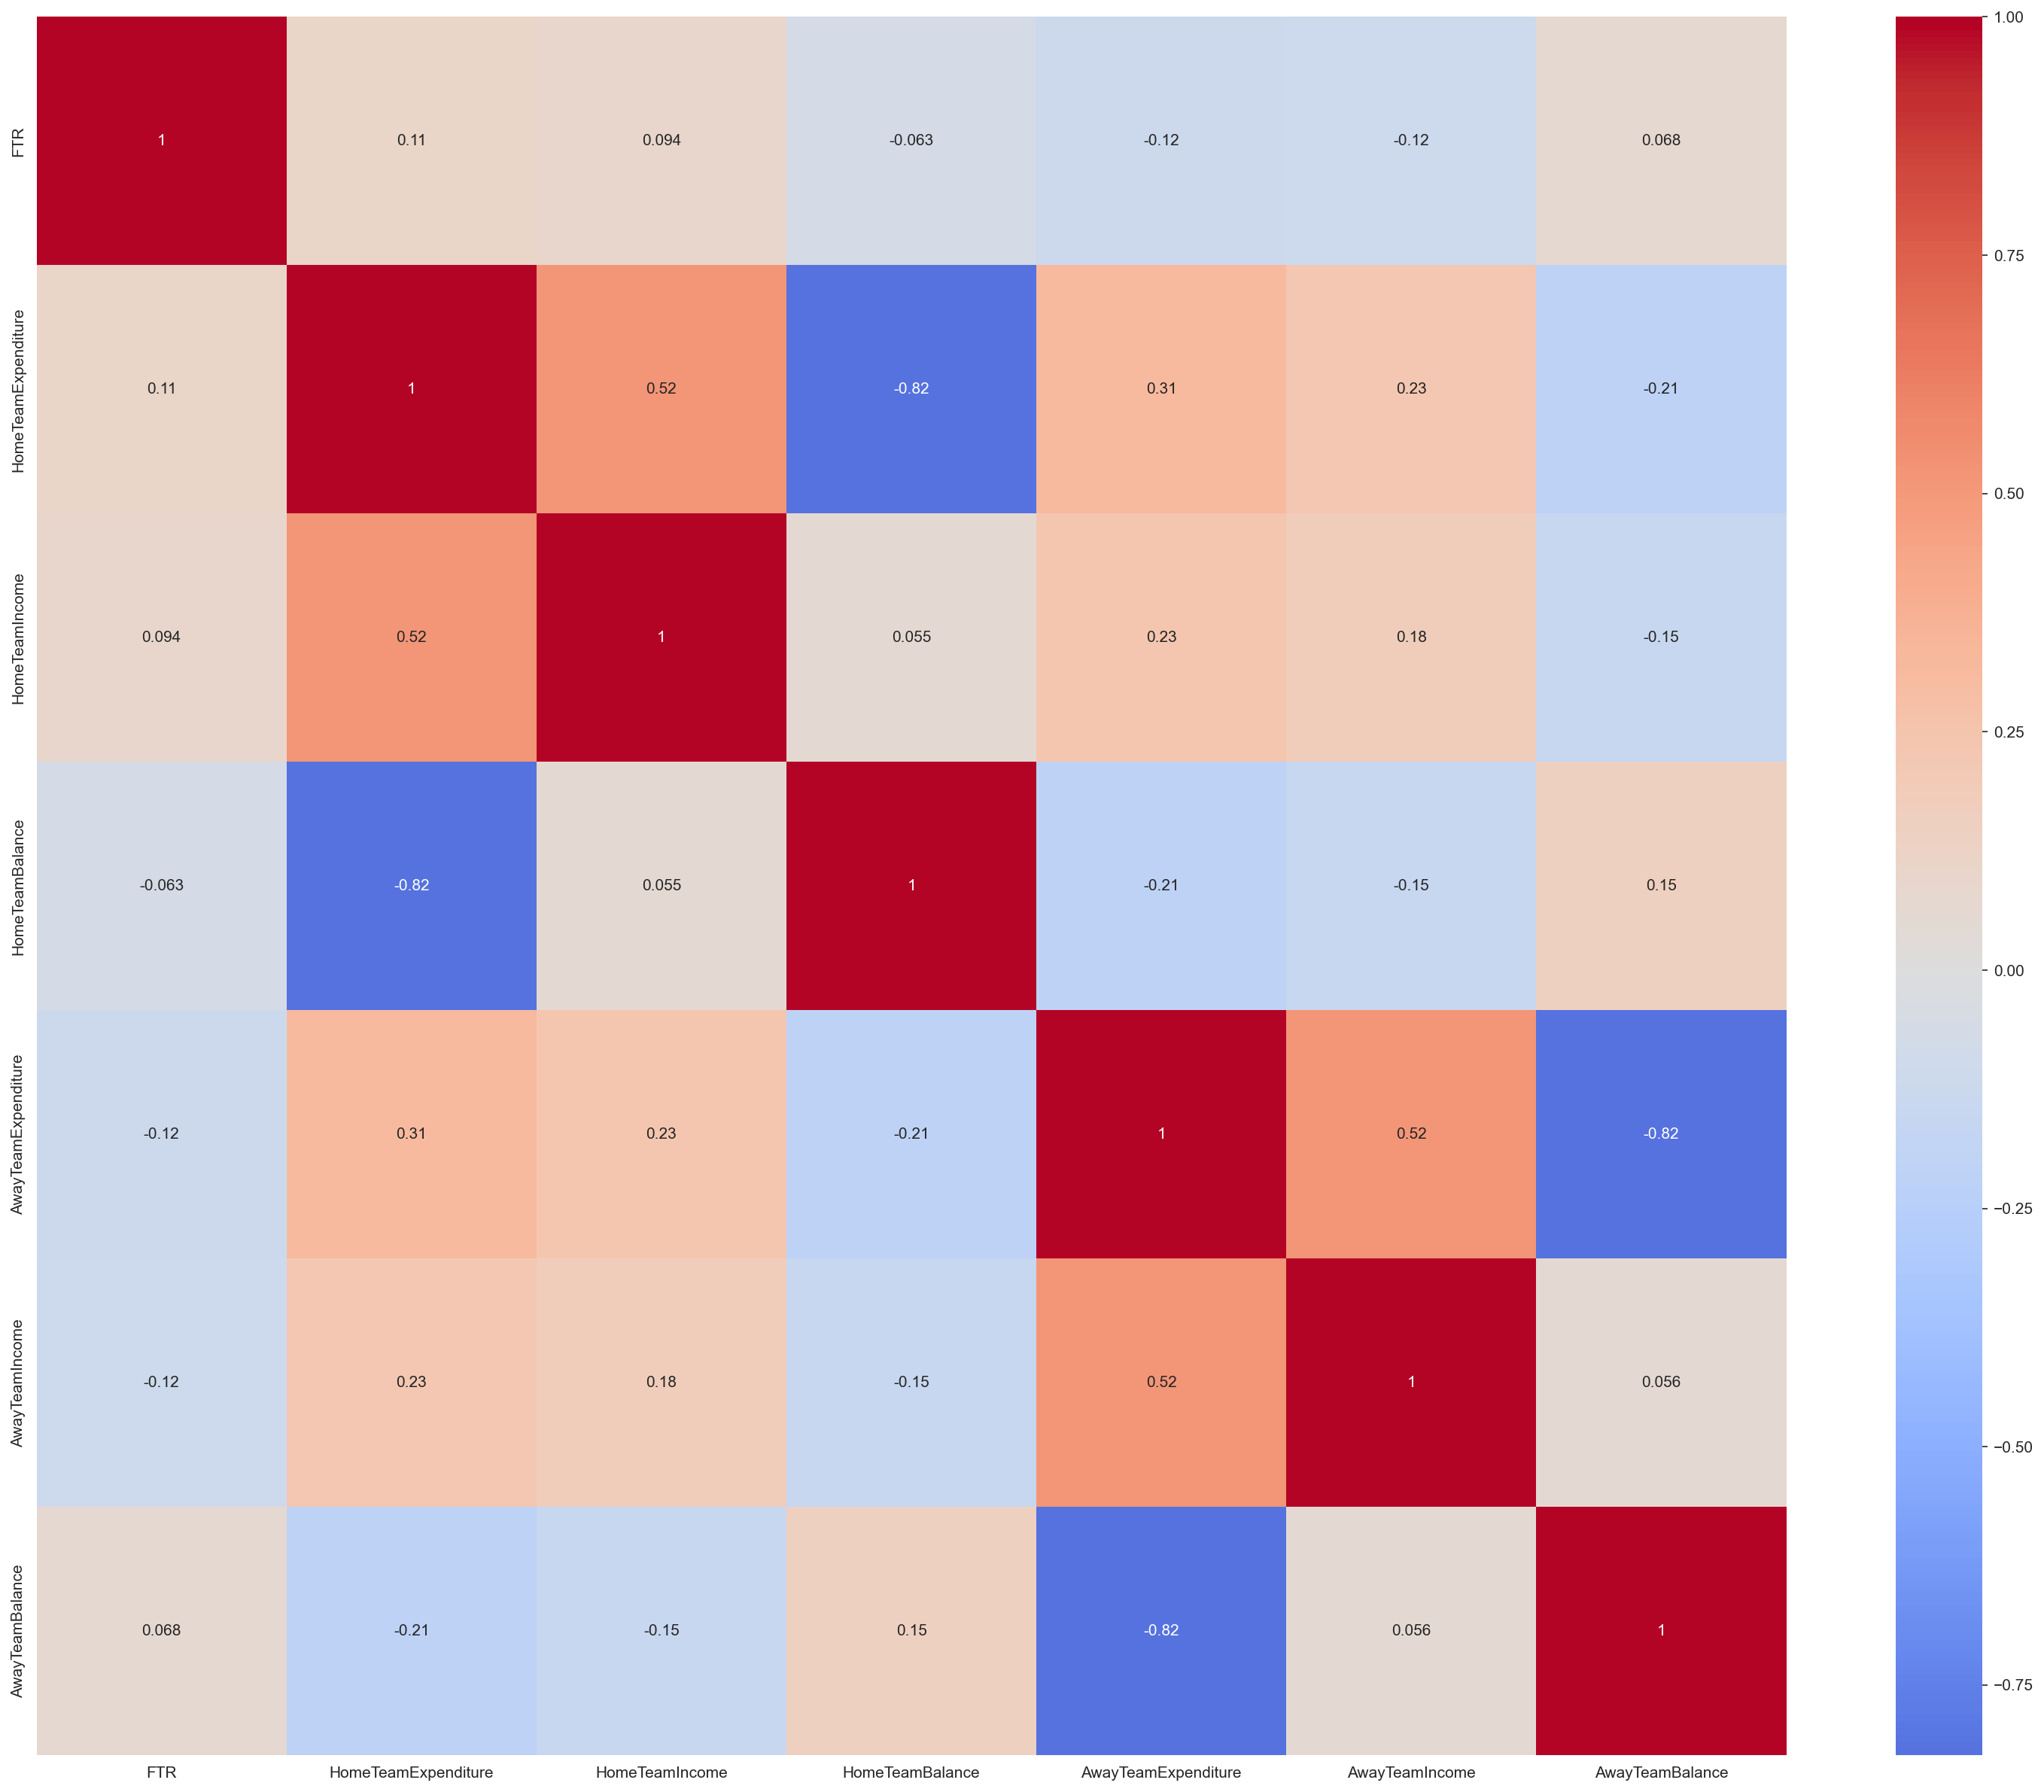

In [25]:
del_columns = [
    "HomeTeam",
    "AwayTeam",
    "Referee",
    "Date",
    "HTR",
    "FTHG",
    "FTAG",
    "HTHG",
    "HTAG",
    "HS",
    "AS",
    "HST",
    "AST",
    "HC",
    "AC",
    "HF",
    "AF",
    "HY",
    "AY",
    "HR",
    "AR",
]
epl_training_df = epl_training_df.drop(del_columns, axis=1)
epl_training_df.to_csv("../processed_df/expenditure_and_income.csv", index=False)
plt.figure(figsize=(25, 20), dpi=150)
epl_training_df['FTR'] = epl_training_df['FTR'].map({'H': 1, 'D': 0, 'A': -1})
epl_training_df = epl_training_df.dropna()
sns.heatmap(epl_training_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [8]:
epl_training_df

,FTR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance
0,1,20.80,0.532,-20.27,20.28,1.460,-18.810
1,1,52.39,37.720,-14.67,18.65,42.400,23.750
2,-1,19.00,26.280,7.28,33.47,10.000,-23.470
3,0,13.33,6.880,-6.45,0.00,0.145,0.145
4,1,53.15,12.330,-40.82,34.48,35.550,1.070
...,...,...,...,...,...,...,...
8835,-1,137.56,156.400,18.84,40.50,82.800,42.300
8836,1,93.00,32.550,-60.45,22.75,0.000,-22.750
8837,0,100.35,195.900,95.55,68.47,52.600,-15.870
8838,1,172.00,60.700,-111.30,122.05,64.820,-57.230
